# Ansome Python + AI

有了 AI 的协助，我们可以在只掌握少量编程知识的情况下，用 Python 实现各种复杂的功能。本章例举一些实例，旨在改变大家对「编程」的认知。

最终你会发现，Python 只是我们完成某些分析和研究任务的工具而已。AI 的作用是让我们使用「自然语言」来编程。此时的编程主要包括如下几个要点：

- 目标是什么？
- 达到目标的思路和方法是什么？
- 拆解：把复杂的问题不断拆解，形成一个个可以清晰界定的小问题。
- 解决：用 Python 代码解决这些小问题。

## 画一幅图

我在 [R for Data Science](https://r4ds.hadley.nz/data-tidy.html) 书中看到了一幅不错的图形，想要绘制出来。这幅图不算复杂：

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250516200413.png)

于是，我把图片发给了 AI 工具，配上提示词：

::: {.callout-prompt}
写一段 Python 代码，制作类似的图形

请注意左右两侧图形的颜色块要一一对应，这是这幅图的关键。
只保留中文注释，图中的文字用英文。
不要显示 warning information
:::

我把相同的问题同时发给了 [ChatGPT](https://chatgpt.com/share/68272fc3-43f0-8005-92ba-b6cafa0cf63d)，DeepSeek 和 [豆包](https://www.doubao.com/thread/w39f7dca2185230bf)。最终，豆包给出的图形效果最好：

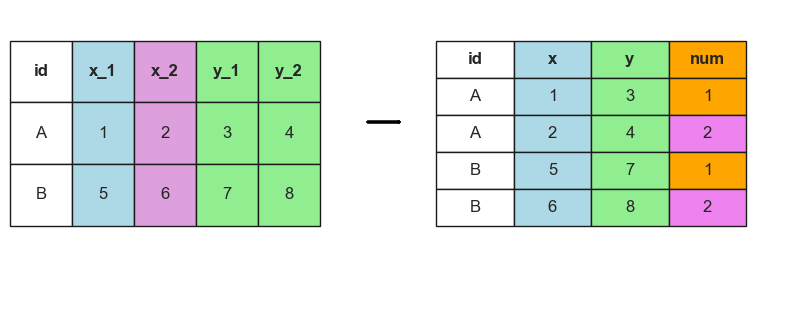

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table
from matplotlib.patches import FancyArrowPatch

# 原始数据
data1 = {
    'id': ['A', 'B'],
    'x_1': [1, 5],
    'x_2': [2, 6],
    'y_1': [3, 7],
    'y_2': [4, 8]
}
df1 = pd.DataFrame(data1)

# 转换后数据
data2 = {
    'id': ['A', 'A', 'B', 'B'],
    'x': [1, 2, 5, 6],
    'y': [3, 4, 7, 8],
    'num': [1, 2, 1, 2]
}
df2 = pd.DataFrame(data2)

# 定义颜色映射
color_mapping = {
    'x_1': 'lightblue',
    'x_2': 'plum',
    'y_1': 'lightgreen',
    'y_2': 'lightgreen',
    'x': 'lightblue',
    'y': 'lightgreen',
    'num': ['orange', 'violet']
}

# 创建图形和子图
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

# 绘制原始表格
# 绘制原始表格
table1 = ax.table(
    cellText=df1.values,
    colLabels=df1.columns,
    cellLoc='center',
    loc='left',
    bbox=[0, 0.3, 0.4, 0.6]
)
for (row, col), cell in table1.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')
    if row > 0:
        colname = df1.columns[col]
        cell.set_facecolor(color_mapping.get(colname, 'white'))
    else:
        colname = df1.columns[col]
        cell.set_facecolor(color_mapping.get(colname, 'white'))

# 绘制箭头
#ax.arrow(0.45, 0.6, 0.1, 0, head_width=0.03, head_length=0.05, fc='k', ec='k')

# 绘制转换后表格
table2 = ax.table(
    cellText=df2.values,
    colLabels=df2.columns,
    cellLoc='center',
    loc='right',
    bbox=[0.55, 0.3, 0.4, 0.6]
)
for (row, col), cell in table2.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')
    if row > 0:
        colname = df2.columns[col]
        if colname == 'num':
            cell.set_facecolor(color_mapping['num'][(row-1) % 2])
        else:
            cell.set_facecolor(color_mapping.get(colname, 'white'))
    else:
        colname = df2.columns[col]
        if colname == 'num':
            cell.set_facecolor(color_mapping['num'][0])
        else:
            cell.set_facecolor(color_mapping.get(colname, 'white'))
            # 添加 FancyArrowPatch 箭头以美化转换效果

            fancy_arrow = FancyArrowPatch(
                (0.48, 0.6), (0.52, 0.6),
                transform=fig.transFigure,
                connectionstyle="arc3,rad=0",
                arrowstyle='-|>',
                linewidth=2,
                color='black'
            )
            fig.patches.append(fancy_arrow)
plt.show()